# Practica Dirigida 1

Curso: Introducción a Machine Learning para las CCSS y Gestión Pública

Integrantes: 

Alfredo Narciso

Anel Vásquez

Luis Contreras

Luis Ramos


## Descenso de gradiente - Implementación y análisis

In [15]:
#Importamos librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

## Definir la Función y la Gradiente

In [25]:
#Definimos la función f(x,y) = x^2 + 2y^2 - 2xy + 2x - 8y + 10 
def f(punto):
    """Calcular el valor de la función en un punto [x, y]."""
    x = punto[0]
    y = punto[1]

    # Función cuadrática: f(x,y) = x^2 + 2y^2 - 2xy + 2x - 8y + 10.

    return x**2 + 2 * y**2 - 2 * x * y + 2 * x - 8 * y + 10

#Definimos la derivada (gradiente) de la función: f'(x,y) = x^2 + 2y^2 - 2xy + 2x - 8y + 10
def grad_f(punto):
    """Calcula el gradiente [df/dx, df/dy] en un punto [x, y]."""

    x = punto[0]
    y = punto[1]

    # Derivada de df/dx = 2x
    df_dx = 2*x - 2*y + 2

    # Derivada de df/dy = 2y
    df_dy = 4*y - 2*x - 8
    
    return np.array([df_dx, df_dy])


## Implementar el Algoritmo de Descenso de Gradiente

In [26]:
def descenso_gradiente (punto_inicial, alpha, n_iteraciones):
    """Ejecuta el algoritmo de Descenso de Gradiente."""
    trayectoria = [punto_inicial]
    punto_actual = punto_inicial.copy()

    for i in range(n_iteraciones):
        # Llama a la función gradiente que define el Paso 1
        grad = grad_f(punto_actual)

        # Actualiza el punto
        punto_actual = punto_actual - alpha * grad

        # Guarda el nuevo punto
        trayectoria.append(punto_actual)

        return np.array(trayectoria)

## Ejecutar y Visualizar

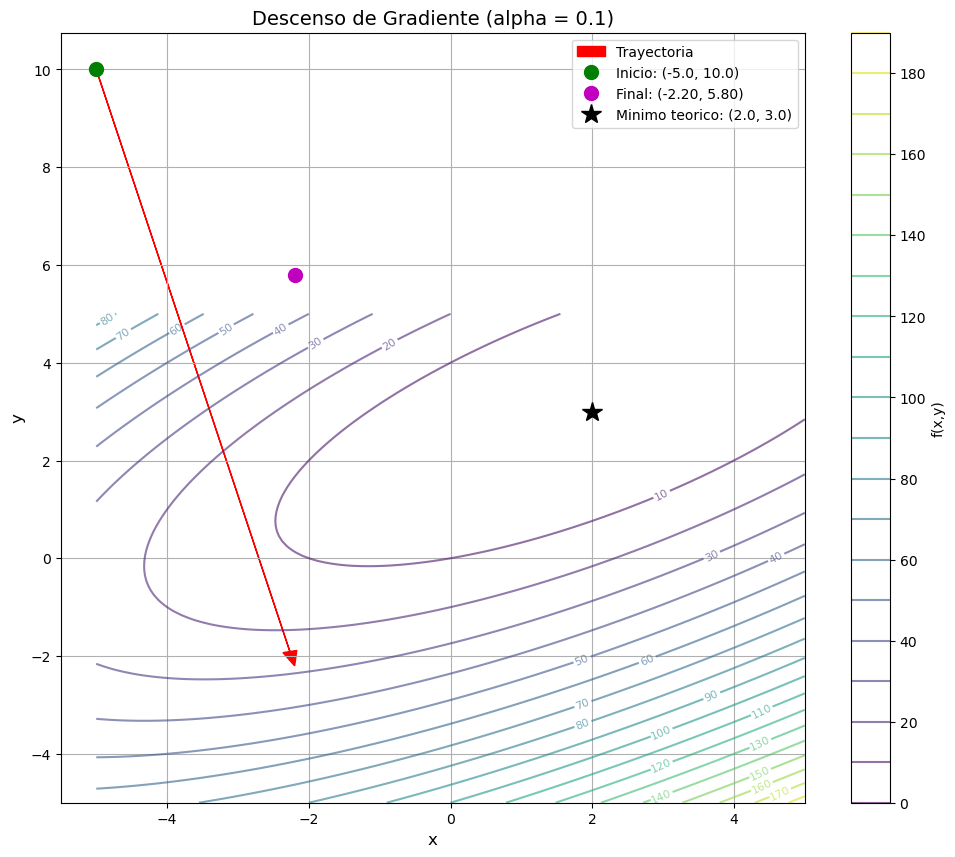

In [30]:
# --- 1. DEFINIR PARÁMETROS ---

punto_inicial = np.array([-5.0, 10.0])
alpha = 0.1
n_iteraciones = 50
minimo_teorico = np.array([2.0, 3.0]) # <-- REEMPLAZAR con el mínimo asignado

# --- 2. EJECUTA EL ALGORITMO (sin cambios) ---

trayectoria = descenso_gradiente(punto_inicial, alpha, n_iteraciones)

# --- 3. PREPARA LA MALLA PARA EL GRAFICO DE CONTORNO ---
# <-- AJUSTA los limites de x e y para que tu trayectoria se vea bien
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X,  Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y]) # Llama a la funcion f que definiste en el Paso 1

# --- 4. CREA EL GRAFICO (Plantilla de Visualizacion) ---
plt.figure(figsize=(12, 10))

# Dibuja las curvas de nivel
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# Dibuja la trayectoria con flechas
for i in range(len(trayectoria) - 1):
    x_start, y_start = trayectoria[i]
    dx = trayectoria[i+1, 0] - x_start
    dy = trayectoria[i+1, 0] - y_start
    plt.arrow(x_start, y_start, dx, dy,
              head_width=0.2, head_length=0.3,
              fc='red', ec='red', length_includes_head=True,
              label='Trayectoria' if i == 0 else "")
    
# Dibuja los puntos clave
plt.plot(punto_inicial[0], punto_inicial[1], 'go', markersize=10,
         label=f'Inicio: ({punto_inicial[0]}, {punto_inicial[1]})')
plt.plot(trayectoria[-1, 0], trayectoria[-1, 1], 'mo', markersize=10,
         label=f'Final: ({trayectoria[-1, 0]:.2f}, {trayectoria[-1, 1]:.2f})')
plt.plot(minimo_teorico[0], minimo_teorico[1], 'k*', markersize=15,
         label=f'Minimo teorico: ({minimo_teorico[0]}, {minimo_teorico[1]})')

#Configura el grafico
plt.title(f'Descenso de Gradiente (alpha = {alpha})', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)
plt.legend()
plt.colorbar(contour, label='f(x,y)')

plt.show()